# Buisness Objective:
- Create a model where the probability that a business goes bankrupt from different features.

# About Dataset:

- The data file contains 7 features about 250 companies
- The data set includes the following variables:
1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7.	class: bankruptcy, non-bankruptcy (target variable).

- The dataset is incoprated in one column & in one row, it requires to seperate it and create new columns as mentioned above statement & Then it need to do an Exploratory Data Analysis(EDA),Visualization,Univariate-multivariate analysis,feature scaling(if require).As it is an classfication Project, we're going to use multiple classifcation Models to check which one out of is the best for this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('bankruptcy-prevention.xlsx')

In [236]:
df.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


In [4]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [5]:
df.shape

(250, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [7]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull() # no null values

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245     True
246     True
247     True
248     True
249     True
Length: 250, dtype: bool

In [11]:
df.columns.duplicated()


array([False, False, False, False, False, False, False])

In [12]:
df.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [13]:
df["industrial_risk"].value_counts()


1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [14]:
df[" management_risk"].value_counts()


1.0    119
0.5     69
0.0     62
Name:  management_risk, dtype: int64

In [15]:
df[" financial_flexibility"].value_counts()

0.0    119
0.5     74
1.0     57
Name:  financial_flexibility, dtype: int64

In [16]:
df[" credibility"].value_counts()

0.0    94
1.0    79
0.5    77
Name:  credibility, dtype: int64

In [17]:
df[" competitiveness"].value_counts()

0.0    103
1.0     91
0.5     56
Name:  competitiveness, dtype: int64

In [18]:
df[" operating_risk"].value_counts()

1.0    114
0.0     79
0.5     57
Name:  operating_risk, dtype: int64

# Rename the columns

In [19]:
df1 = df.rename({' industrial_risk': ' Industrial',
                 ' management_risk': 'Management',
                 ' financial_flexibility': 'Financial',
                 ' credibility': 'Credibility',
                 ' competitiveness': 'Competitive',
                 ' operating_risk': 'Operational',
                ' class' : 'class'},
                axis=1)

In [20]:
df1.head()

,industrial_risk,Management,Financial,Credibility,Competitive,Operational,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Using distplot

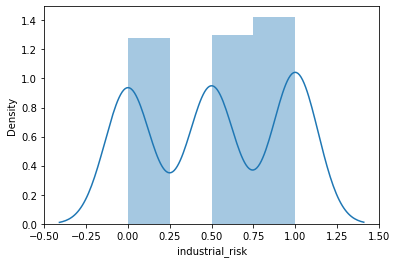

In [22]:
sns.distplot(df1['industrial_risk'])
plt.show()

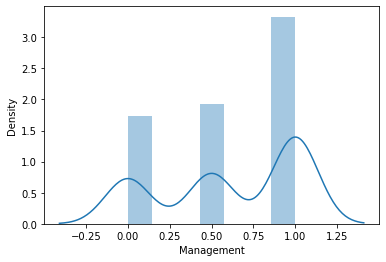

In [23]:
sns.distplot(df1['Management'])
plt.show()

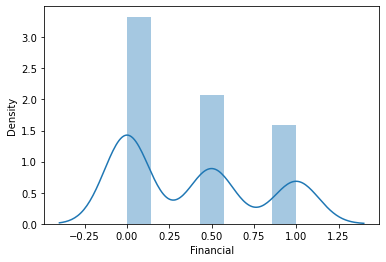

In [24]:
sns.distplot(df1['Financial'])
plt.show()

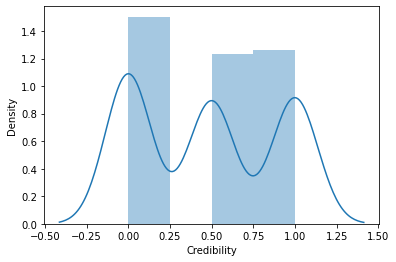

In [25]:
sns.distplot(df1['Credibility'])
plt.show()

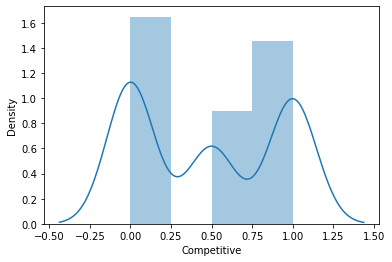

In [26]:
sns.distplot(df1['Competitive'])
plt.show()

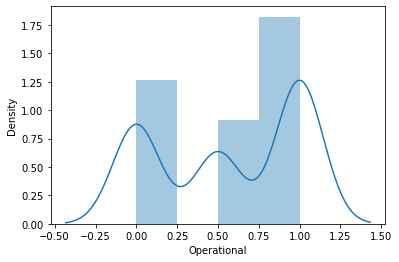

In [27]:
sns.distplot(df1['Operational'])
plt.show()

# Using Swarmplot

<AxesSubplot:xlabel='industrial_risk', ylabel='class'>

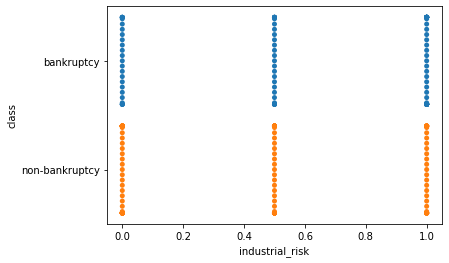

In [28]:
sns.swarmplot(df1['industrial_risk'],df1['class'])


<AxesSubplot:xlabel='Management', ylabel='class'>

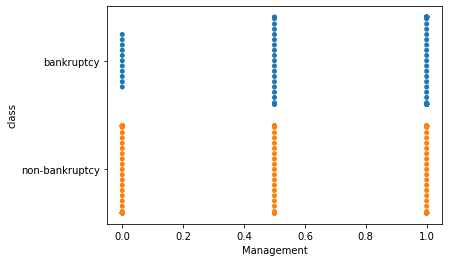

In [29]:
sns.swarmplot(df1['Management'],df1['class'])


<AxesSubplot:xlabel='Financial', ylabel='class'>

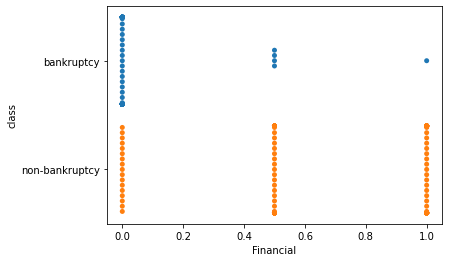

In [30]:
sns.swarmplot(df1['Financial'],df1['class'])


<AxesSubplot:xlabel='Credibility', ylabel='class'>

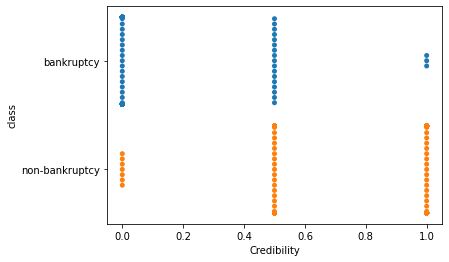

In [31]:
sns.swarmplot(df1['Credibility'],df1['class'])


<AxesSubplot:xlabel='Competitive', ylabel='class'>

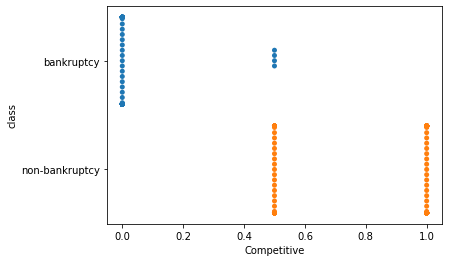

In [32]:
sns.swarmplot(df1['Competitive'],df1['class'])


<AxesSubplot:xlabel='Operational', ylabel='class'>

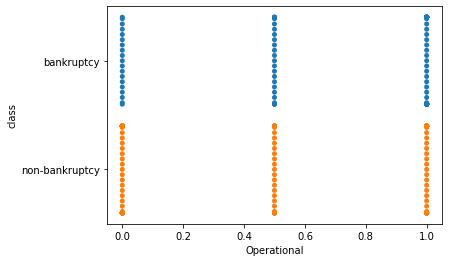

In [33]:
sns.swarmplot(df1['Operational'],df1['class'])


# Using Countplot

<AxesSubplot:xlabel='industrial_risk', ylabel='count'>

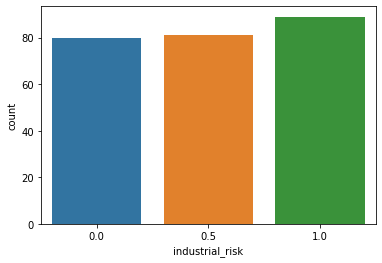

In [34]:
sns.countplot(df1['industrial_risk'])

<AxesSubplot:xlabel='Management', ylabel='count'>

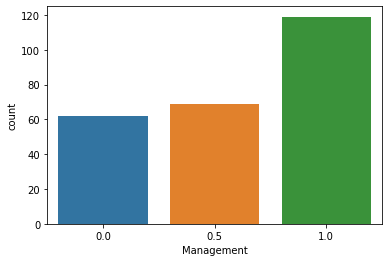

In [35]:
sns.countplot(df1['Management'])

<AxesSubplot:xlabel='Financial', ylabel='count'>

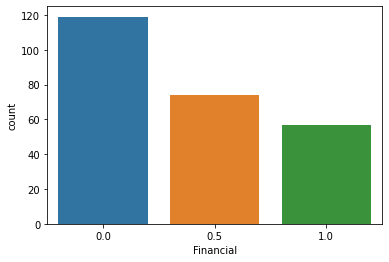

In [36]:
sns.countplot(df1['Financial'])

<AxesSubplot:xlabel='Credibility', ylabel='count'>

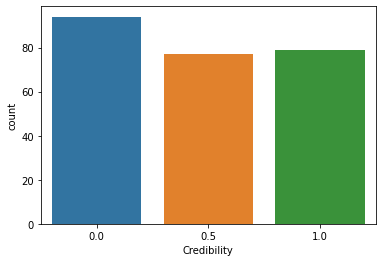

In [37]:
sns.countplot(df1['Credibility'])

<AxesSubplot:xlabel='Competitive', ylabel='count'>

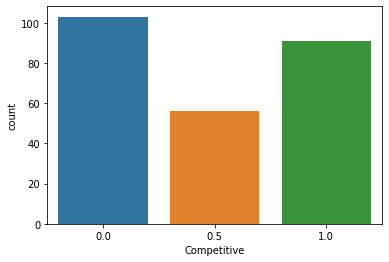

In [38]:
sns.countplot(df1['Competitive'])

<AxesSubplot:xlabel='Operational', ylabel='count'>

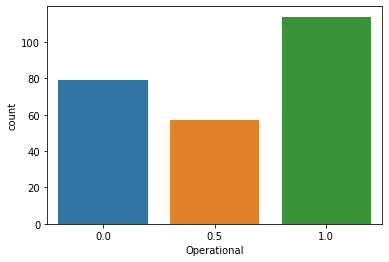

In [39]:
sns.countplot(df1['Operational'])

# using Boxplot

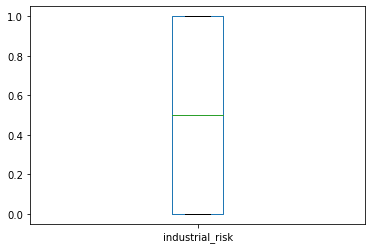

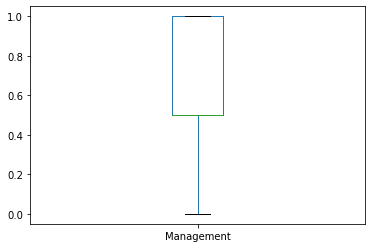

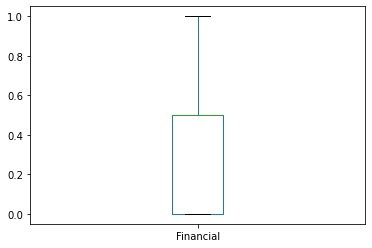

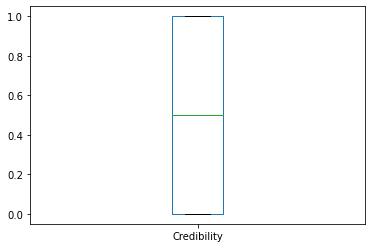

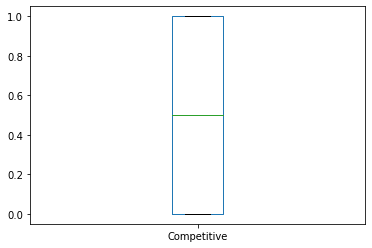

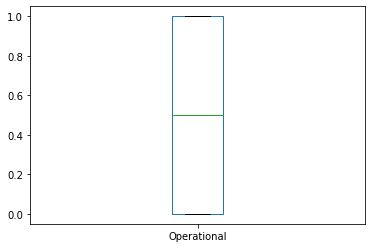

In [40]:

import matplotlib.pyplot as plt

def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
    
plot_boxplot(df1, "industrial_risk")

    
plot_boxplot(df1, "Management")

    
plot_boxplot(df1, "Financial")

     
plot_boxplot(df1, "Credibility")

plot_boxplot(df1, "Competitive")

plot_boxplot(df1, "Operational")

In [41]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1-1.5* IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls


index_list = []
for feature in ["industrial_risk","Management","Financial","Credibility","Competitive","Operational"]:
    index_list.extend(outliers(df1,feature))


index_list

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

df_cleaned = remove(df1,index_list)
df_cleaned.shape


df_cleaned.shape

(250, 7)

In [42]:
df1 = df_cleaned

In [43]:
df1.head()

,industrial_risk,Management,Financial,Credibility,Competitive,Operational,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


# Histogram

<AxesSubplot:>

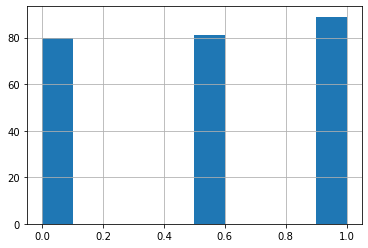

In [44]:
df1["industrial_risk"].hist()

<AxesSubplot:>

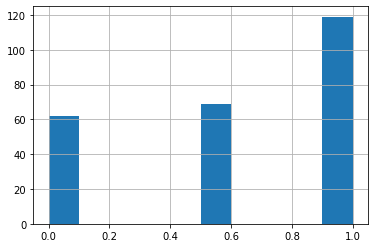

In [45]:
df1["Management"].hist()


<AxesSubplot:>

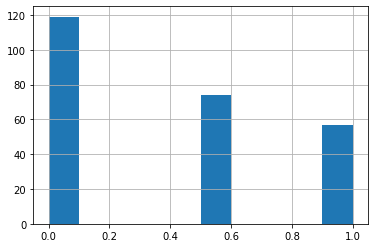

In [46]:
df1["Financial"].hist()


<AxesSubplot:>

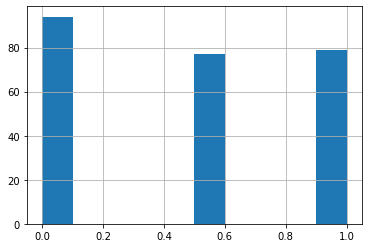

In [47]:
df1["Credibility"].hist()


<AxesSubplot:>

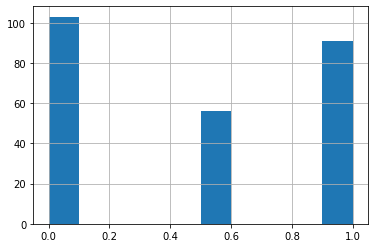

In [48]:
df1["Competitive"].hist()


<AxesSubplot:>

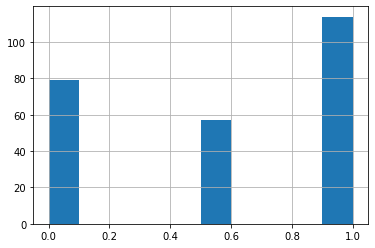

In [49]:
df1["Operational"].hist()


# Using LabelEncoder converting categoricalinto numerical

In [50]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df1["class"] = LE.fit_transform(df1["class"])

# bankruptcy = 0   , nonbankruptcy = 1

In [51]:
df1.head()

,industrial_risk,Management,Financial,Credibility,Competitive,Operational,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


# PieChart

<AxesSubplot:ylabel='class'>

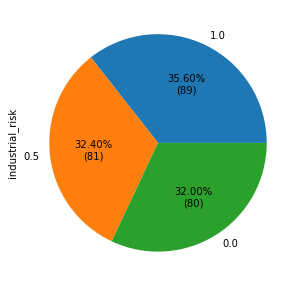

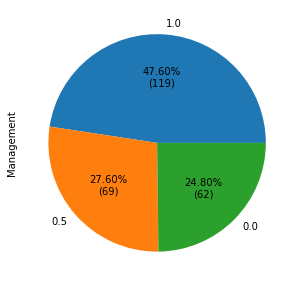

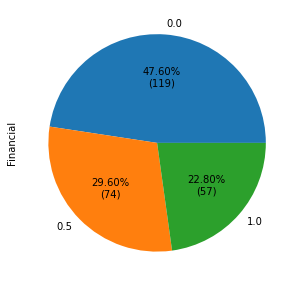

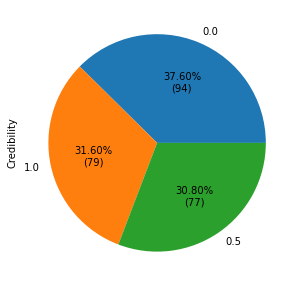

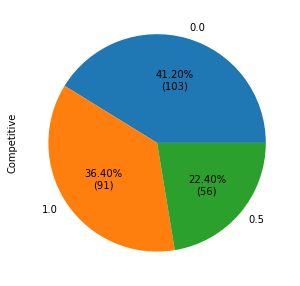

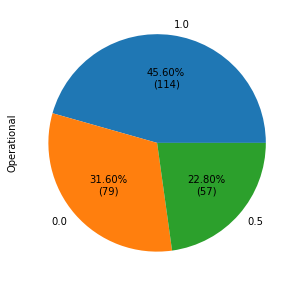

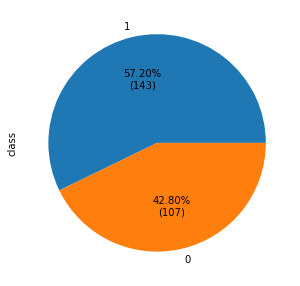

In [52]:
plt.figure(figsize=(5,5))
df1['industrial_risk'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['industrial_risk'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['Management'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Management'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['Financial'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Financial'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['Credibility'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Credibility'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['Competitive'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Competitive'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['Operational'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Operational'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['class'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['class'].value_counts().sum())))

# Finding the Skewness

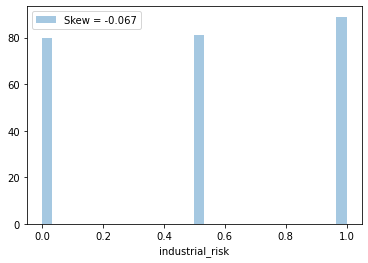

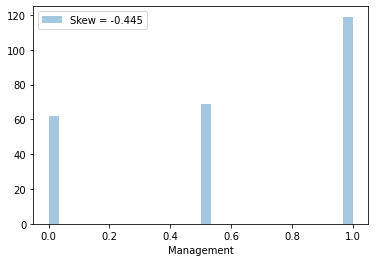

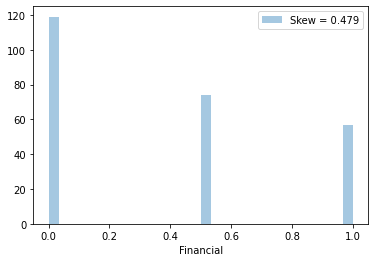

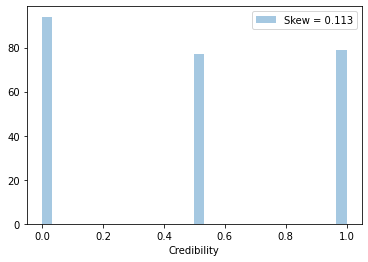

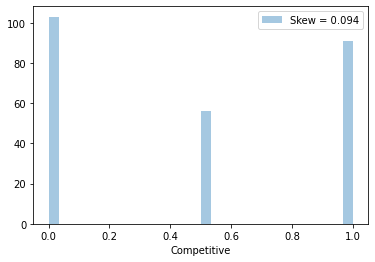

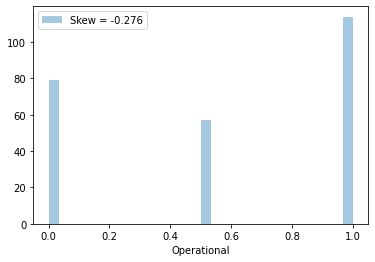

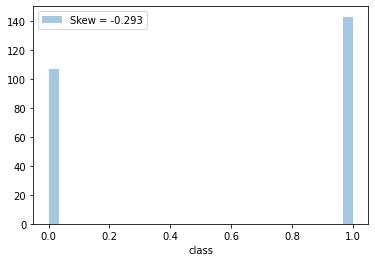

In [53]:
features=[feature for feature in df1.columns if df1[feature].dtypes != 'O']
for feat in features:
    skew = df1[feat].skew()
    sns.distplot(df1[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# Using Countplot

<AxesSubplot:xlabel='industrial_risk', ylabel='count'>

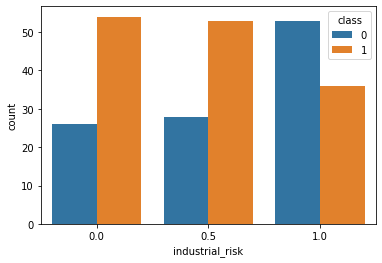

In [54]:
sns.countplot(df1['industrial_risk'],
              hue=df1['class'])

<AxesSubplot:xlabel='Management', ylabel='count'>

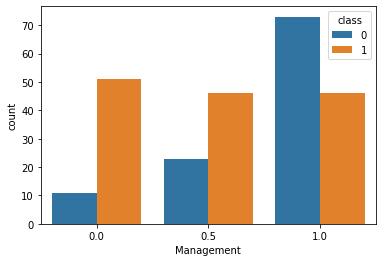

In [55]:
sns.countplot(df1['Management'],
              hue=df1['class'])

<AxesSubplot:xlabel='Financial', ylabel='count'>

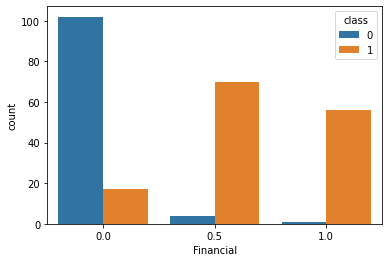

In [56]:
sns.countplot(df1['Financial'],
              hue=df1['class'])

<AxesSubplot:xlabel='Credibility', ylabel='count'>

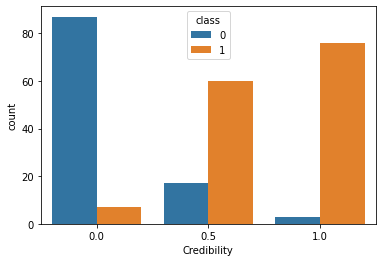

In [57]:
sns.countplot(df1['Credibility'],
              hue=df1['class'])

<AxesSubplot:xlabel='Competitive', ylabel='count'>

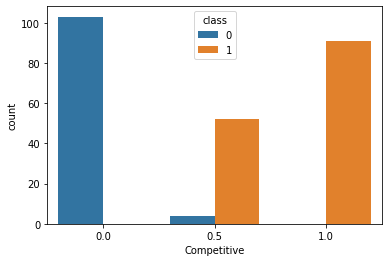

In [58]:
sns.countplot(df1['Competitive'],
              hue=df1['class'])

<AxesSubplot:xlabel='Operational', ylabel='count'>

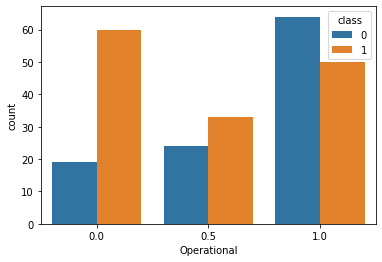

In [59]:
sns.countplot(df1['Operational'],
              hue=df1['class'])

# Pairplot

<Figure size 576x576 with 0 Axes>

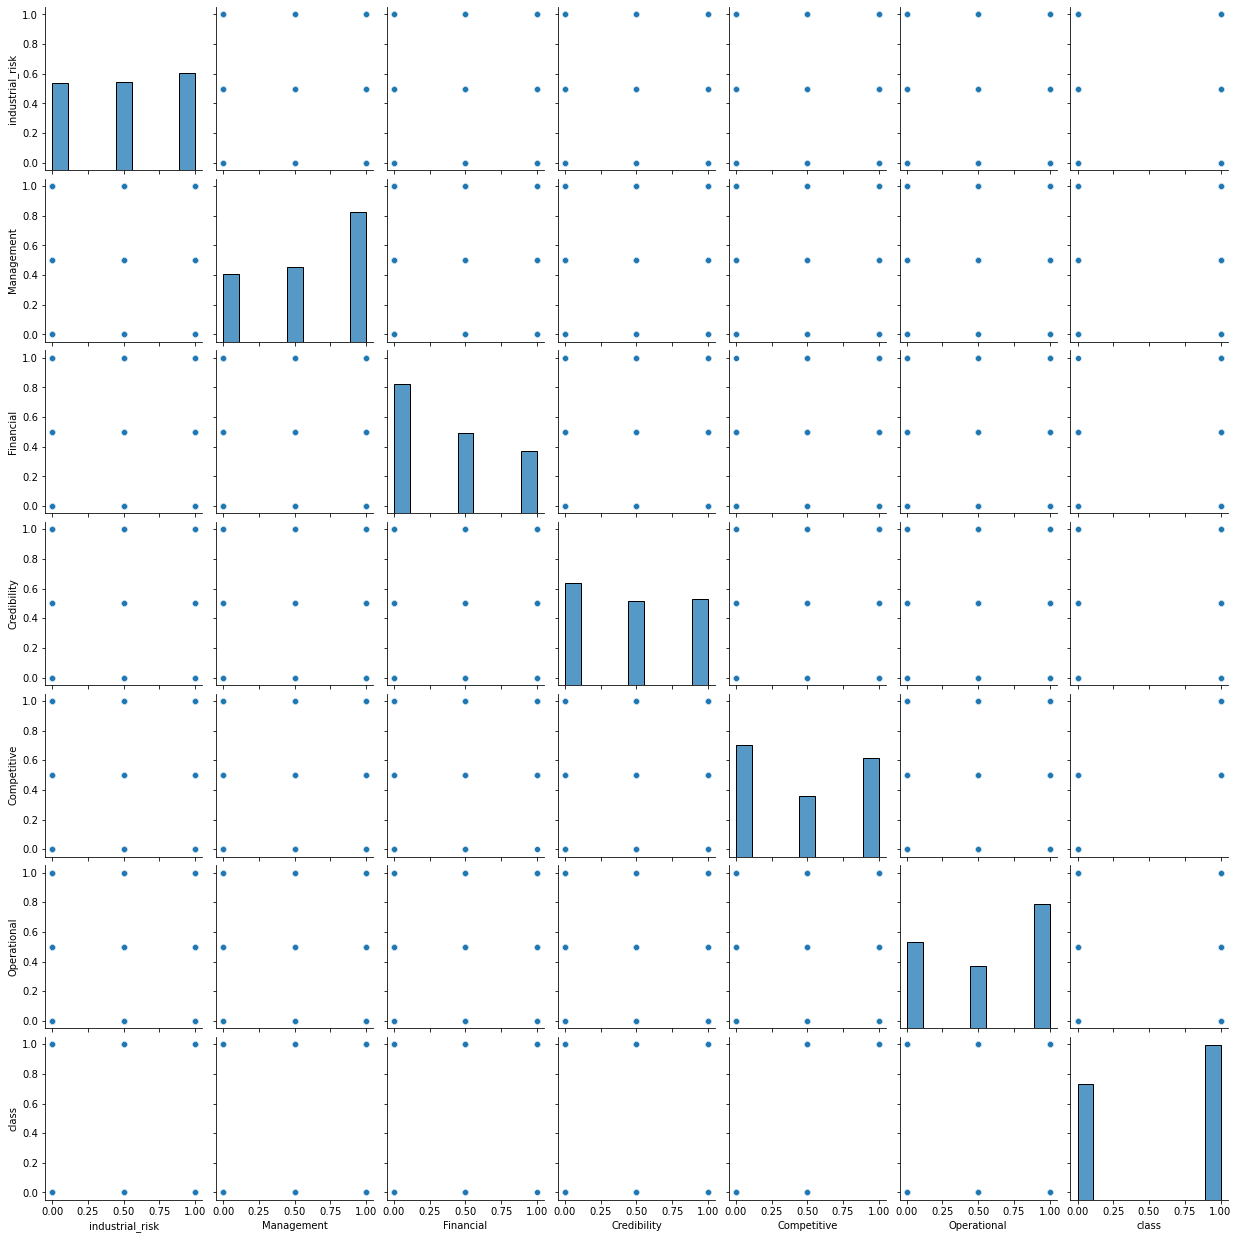

In [60]:
plt.figure(figsize=(8,8))
sns.pairplot(df1, palette='coolwarm')
plt.show()

# CoorRelation

In [61]:
df1.corr()

,industrial_risk,Management,Financial,Credibility,Competitive,Operational,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
Management,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
Financial,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
Credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
Competitive,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
Operational,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


In [62]:
df1.corr()['class']

industrial_risk   -0.227823
Management        -0.370838
Financial          0.751020
Credibility        0.755909
Competitive        0.899452
Operational       -0.279786
class              1.000000
Name: class, dtype: float64

# Heatmap

<AxesSubplot:>

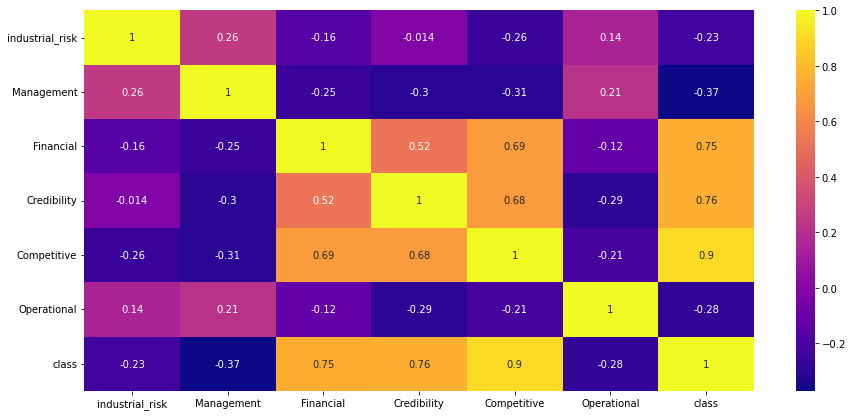

In [63]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True,cmap='plasma')

# Observation  of correlation
* To check the feature to featurs & Feature to target relation,have plotted pair plot but unfortunately it doesn't seen any  
  linear connection between them.
* We observed that there is some positive correalation between features like "financial", credibility & Competitive with class   variable/target variable.
* financial & competitive have the maximum positive correlation of 0.69

# Model Building

In [64]:
df1.columns

Index(['industrial_risk', 'Management', 'Financial', 'Credibility',
       'Competitive', 'Operational', 'class'],
      dtype='object')

In [65]:
X = df1.drop('class',axis=1)
Y = df1['class']

In [66]:
X.head()

,industrial_risk,Management,Financial,Credibility,Competitive,Operational
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [67]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

# Split the data set into train & test

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .25,random_state = 42)

In [69]:
X_train.shape


(187, 6)

In [70]:
X_test.shape

(63, 6)

In [71]:
Y_train.shape

(187,)

In [72]:
Y_test.shape

(63,)

# MODEL BUILDING

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()
Logistic.fit(X_train,Y_train)
Y_pred_train = Logistic.predict(X_train)
Y_pred_test  = Logistic.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix
train_cm1 = confusion_matrix(Y_train,Y_pred_train)
test_cm1 = confusion_matrix(Y_test,Y_pred_test)


In [75]:
train_cm1

array([[ 84,   1],
       [  0, 102]], dtype=int64)

In [76]:
test_cm1

array([[22,  0],
       [ 0, 41]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [78]:
Accuracy_score_train_1 = accuracy_score(Y_train,Y_pred_train).round(3) # TN + TP / Total samples
Accuracy_score_train_1


0.995

In [79]:
Accuracy_score_test_1 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_1

1.0

In [80]:
Sensitivity_score_train_1 = recall_score(Y_train,Y_pred_train).round(3) # TPR = TP / (TP + FN)
Sensitivity_score_train_1

1.0

In [81]:
Sensitivity_score_test_1 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_1

1.0

In [82]:
Precision_score_train_1 = precision_score(Y_train,Y_pred_train).round(3) # TP / (TP + FP)
Precision_score_train_1

0.99

In [83]:
Precision_score_test_1 = precision_score(Y_test,Y_pred_test).round(3)

In [84]:
F1_score_train_1=f1_score(Y_train,Y_pred_train).round(3) # (2 * PRECISION * RECALL) / (PRECISION + RECALL)
F1_score_train_1

0.995

In [85]:
F1_score_test_1 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_1

1.0

# ROC CURVE FOR TRAIN ACCURACY

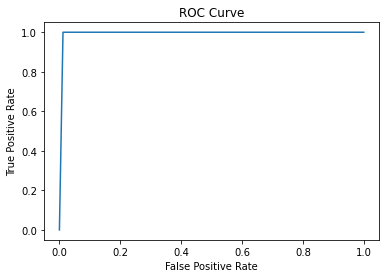

In [86]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(Y_train, Y_pred_train)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [87]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(Y_train, Y_pred_train)

print('AUC-ROC score:', auc_roc)

AUC-ROC score: 0.9941176470588236


# ROC CURVE FOR TEST ACCURACY

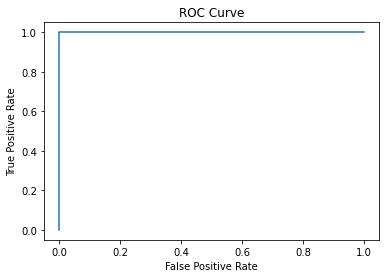

In [88]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [89]:
from sklearn.metrics import roc_auc_score

# assuming you have true labels Y_test and predicted probabilities Y_pred_proba_test
auc_roc = roc_auc_score(Y_test, Y_pred_test)

print('AUC-ROC score:', auc_roc)

AUC-ROC score: 1.0


# USING VIF VALUE FINDING THE MULTICOLLINEARITY

In [90]:
import statsmodels.formula.api as smf


In [91]:
import pandas as pd
import statsmodels.formula.api as smf

# Fit OLS models and calculate VIF
industrial_risk = smf.ols('industrial_risk~Management+Financial+Credibility+Competitive+Operational',data=df1).fit()  
vif_industrial_risk = 1/(1-industrial_risk.rsquared)

Management = smf.ols('Management~industrial_risk+Financial+Credibility+Competitive+Operational',data=df1).fit()  
vif_management = 1/(1-Management.rsquared)

Financial = smf.ols('Financial~industrial_risk+Management+Credibility+Competitive+Operational',data=df1).fit()  
vif_financial = 1/(1-Financial.rsquared)

Credibility = smf.ols('Credibility~industrial_risk+Management+Financial+Competitive+Operational',data=df1).fit()  
vif_Credibility = 1/(1-Credibility.rsquared)

Competitive = smf.ols('Competitive~industrial_risk+Management+Financial+Credibility+Operational',data=df1).fit()  
vif_Competitive = 1/(1-Competitive.rsquared)

Operational = smf.ols('Operational~industrial_risk+Management+Financial+Credibility+Competitive',data=df1).fit()  
vif_Operational = 1/(1-Operational.rsquared)

# Storing VIF values in a data frame
d = {'Variables':['industrial_risk','Management','Financial','Credibility','Competitive','Operational'],'VIF':[vif_industrial_risk,vif_management,vif_financial,vif_Credibility,vif_Competitive,vif_Operational]}
Vif_frame = pd.DataFrame(d)  
Vif_frame


,Variables,VIF
0,industrial_risk,1.208550
1,Management,1.205396
2,Financial,1.931439
3,Credibility,2.128103
4,Competitive,2.788219
5,Operational,1.134261


# FINDING THE LOG LOSS

In [92]:
from sklearn.metrics import log_loss

# assuming Y_train is the true labels of the training set and Y_pred_train is the predicted probabilities of the positive class
log_loss_train = log_loss(Y_train, Y_pred_train)

# assuming Y_test is the true labels of the test set and Y_pred_test is the predicted probabilities of the positive class
log_loss_test = log_loss(Y_test, Y_pred_test)

print('Log loss for training set:', log_loss_train)
print('Log loss for test set:', log_loss_test)

Log loss for training set: 0.1847036149323051
Log loss for test set: 9.992007221626415e-16


# k-nearest neighbors classifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5, p=2) # p=2 specifies the Euclidean distance metric
KNN.fit(X_train, Y_train)
Y_pred_train = KNN.predict(X_train)
Y_pred_test = KNN.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix
train_cm2 = confusion_matrix(Y_train,Y_pred_train)
test_cm2= confusion_matrix(Y_test,Y_pred_test)


In [95]:
train_cm2

array([[ 84,   1],
       [  0, 102]], dtype=int64)

In [96]:
test_cm2

array([[22,  0],
       [ 1, 40]], dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [98]:
Accuracy_score_train_2 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_2 = Accuracy_score_test_2 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_2

0.984

In [99]:
Accuracy_score_test_2 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_2

0.984

In [100]:
Sensitivity_score_train_2 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_2

1.0

In [101]:
Sensitivity_score_test_2 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_2

0.976

In [102]:
Precision_score_train_2 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_2

0.99

In [103]:
Precision_score_test_2 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_2

1.0

In [104]:
F1_score_train_2 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_2

0.995

In [105]:
F1_score_test_2 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_2


0.988

# Multinomial Naive Bayes classifier

In [106]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the MultinomialNB class
NB = MultinomialNB()

# Fit the model to the training data
NB.fit(X_train, Y_train)

# Make predictions on the training and test data
Y_pred_train = NB.predict(X_train)
Y_pred_test = NB.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix
train_cm3 = confusion_matrix(Y_train,Y_pred_train)
test_cm3 = confusion_matrix(Y_test,Y_pred_test)

In [108]:
train_cm3

array([[ 80,   5],
       [  0, 102]], dtype=int64)

In [109]:
test_cm3

array([[22,  0],
       [ 0, 41]], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [111]:
Accuracy_score_train_3 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_3

0.973

In [112]:
Accuracy_score_test_3 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_3

1.0

In [113]:
Sensitivity_score_train_3 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_3

1.0

In [114]:
Sensitivity_score_test_3 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_3

1.0

In [115]:
Precision_score_train_3 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_3

0.953

In [116]:
Precision_score_test_3 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_3

1.0

In [117]:
F1_score_train_3 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_3

0.976

In [118]:
F1_score_test_3 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_3

1.0

# SUPPORT VECTOR MACHINE USING POLYNOMIAL FUNCTION

In [119]:
from sklearn.svm import SVC

svc = SVC(kernel = 'poly', degree = 2) 
svc.fit(X_train, Y_train)
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix
train_cm4 = confusion_matrix(Y_train,Y_pred_train)
test_cm4 = confusion_matrix(Y_test,Y_pred_test)

In [121]:
train_cm4

array([[ 85,   0],
       [  0, 102]], dtype=int64)

In [122]:
test_cm4

array([[22,  0],
       [ 1, 40]], dtype=int64)

In [123]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [124]:
Accuracy_score_train_4 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_4

1.0

In [125]:
Accuracy_score_test_4 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_4

0.984

In [126]:
Sensitivity_score_train_4 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_4

1.0

In [127]:
Sensitivity_score_test_4 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_4

0.976

In [128]:
Precision_score_train_4 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_4

1.0

In [129]:
Precision_score_test_4 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_4

1.0

In [130]:
F1_score_train_4 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_4

1.0

In [131]:
F1_score_test_4 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_4


0.988

# SUPPORT VECTOR MACHINE USING LINEAR FUNCTION

In [132]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', C = 5.0) 
svc.fit(X_train, Y_train)
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test)

In [133]:
from sklearn.metrics import confusion_matrix
train_cm5 = confusion_matrix(Y_train,Y_pred_train)
test_cm5 = confusion_matrix(Y_test,Y_pred_test)

In [134]:
train_cm5

array([[ 85,   0],
       [  0, 102]], dtype=int64)

In [135]:
test_cm5

array([[22,  0],
       [ 1, 40]], dtype=int64)

In [136]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [137]:
Accuracy_score_train_5 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_5

1.0

In [138]:
Accuracy_score_test_5 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_5

0.984

In [139]:
Sensitivity_score_train_5 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_5

1.0

In [140]:
Sensitivity_score_test_5 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_5

0.976

In [141]:
Precision_score_train_5 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_5

1.0

In [142]:
Precision_score_test_5 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_5

1.0

In [143]:
F1_score_train_5 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_5

1.0

In [144]:
F1_score_test_5 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_5

0.988

# DECISION TREE USING GINI_INDRX

In [145]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='gini',max_depth=None)

classifier.fit(X , Y)

Y_pred_train = classifier.predict(X_train)

Y_pred_test = classifier.predict(X_test)





In [146]:
from sklearn.metrics import confusion_matrix
train_cm6 = confusion_matrix(Y_train,Y_pred_train)
test_cm6 = confusion_matrix(Y_test,Y_pred_test)

In [147]:
train_cm6

array([[ 85,   0],
       [  0, 102]], dtype=int64)

In [148]:
test_cm6

array([[22,  0],
       [ 0, 41]], dtype=int64)

In [149]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [150]:
Accuracy_score_train_6 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_6

1.0

In [151]:
Accuracy_score_test_6 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_6

1.0

In [152]:
Sensitivity_score_train_6 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_6

1.0

In [153]:
Sensitivity_score_test_6 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_6

1.0

In [154]:
Precision_score_train_6 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_6

1.0

In [155]:
Precision_score_test_6 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_6

1.0

In [156]:
F1_score_train_6 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_6

1.0

In [157]:
F1_score_test_6 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_6

1.0

In [158]:
'''from sklearn import tree
import graphviz

#Define classifier and train it
classifier = tree.DecisionTreeClassifier()

classifier.fit(X_train, Y_train)

#Export the decision tree to a Graphviz-compatible format
data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded=True, special_characters=True)

#Create a visual representation of the decision tree using Graphviz
graph = graphviz.Source(data)
graph.render("decision_tree")  # Save the visualization to a PDF file

graph'''


'from sklearn import tree\nimport graphviz\n\n#Define classifier and train it\nclassifier = tree.DecisionTreeClassifier()\n\nclassifier.fit(X_train, Y_train)\n\n#Export the decision tree to a Graphviz-compatible format\ndata = tree.export_graphviz(classifier, out_file=None, filled=True, rounded=True, special_characters=True)\n\n#Create a visual representation of the decision tree using Graphviz\ngraph = graphviz.Source(data)\ngraph.render("decision_tree")  # Save the visualization to a PDF file\n\ngraph'

# DECISION TREE USING ENTROPY

In [159]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy',max_depth=None)

classifier.fit(X , Y)

Y_pred_train = classifier.predict(X_train)

Y_pred_test = classifier.predict(X_test)


In [160]:
from sklearn.metrics import confusion_matrix
train_cm7 = confusion_matrix(Y_train,Y_pred_train)
test_cm7 = confusion_matrix(Y_test,Y_pred_test)

In [161]:
train_cm7

array([[ 85,   0],
       [  0, 102]], dtype=int64)

In [162]:
test_cm7

array([[22,  0],
       [ 0, 41]], dtype=int64)

In [163]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [164]:
Accuracy_score_train_7 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_7

1.0

In [165]:
Accuracy_score_test_7 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_7

1.0

In [166]:
Sensitivity_score_train_7 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_7

1.0

In [167]:
Sensitivity_score_test_7 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_7

1.0

In [168]:
Precision_score_train_7 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_7

1.0

In [169]:
Precision_score_test_7 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_7

1.0

In [170]:
F1_score_train_7 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_7

1.0

In [171]:
F1_score_test_7 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_7

1.0

# BAGGING CLASSIFIER

In [172]:
from sklearn.ensemble import BaggingClassifier

DT = DecisionTreeClassifier(max_depth=6)


BAG = BaggingClassifier(base_estimator=DT, n_estimators=100,max_samples= 0.6)


BAG.fit(X , Y)

Y_pred_train = BAG.predict(X_train)

Y_pred_test = BAG.predict(X_test)


In [173]:
from sklearn.metrics import confusion_matrix
train_cm8 = confusion_matrix(Y_train,Y_pred_train)
test_cm8 = confusion_matrix(Y_test,Y_pred_test)

In [174]:
train_cm8

array([[ 85,   0],
       [  0, 102]], dtype=int64)

In [175]:
test_cm8

array([[22,  0],
       [ 0, 41]], dtype=int64)

In [176]:
Accuracy_score_train_8 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_8

1.0

In [177]:
Accuracy_score_test_8 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_8

1.0

In [178]:
Sensitivity_score_train_8 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_8

1.0

In [179]:
Sensitivity_score_test_8 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_8

1.0

In [180]:
Precision_score_train_8 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_8

1.0

In [181]:
Precision_score_test_8 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_8

1.0

In [182]:
F1_score_train_8 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_8

1.0

In [183]:
F1_score_test_8 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_8

1.0

# RANDOM FOREST CLASSIFIER

In [184]:
from sklearn.ensemble import RandomForestClassifier

#DT = DecisionTreeClassifier(max_depth=6)


RFC = RandomForestClassifier( n_estimators=100,max_samples= 0.6)


RFC.fit(X , Y)

Y_pred_train = RFC.predict(X_train)

Y_pred_test = RFC.predict(X_test)


In [185]:
from sklearn.metrics import confusion_matrix
train_cm9 = confusion_matrix(Y_train,Y_pred_train)
test_cm9 = confusion_matrix(Y_test,Y_pred_test)

In [186]:
train_cm9

array([[ 85,   0],
       [  0, 102]], dtype=int64)

In [187]:
test_cm9

array([[22,  0],
       [ 0, 41]], dtype=int64)

In [188]:
Accuracy_score_train_9 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_9

1.0

In [189]:
Accuracy_score_test_9 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_9

1.0

In [190]:
Sensitivity_score_train_9 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_9

1.0

In [191]:
Sensitivity_score_test_9 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_9

1.0

In [192]:
Precision_score_train_9 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_9

1.0

In [193]:
Precision_score_test_9 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_9

1.0

In [194]:
F1_score_train_9 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_9

1.0

In [195]:
F1_score_test_9 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_9

1.0

# GRADIENT BOOSTING CLASSIFIER

In [196]:
from sklearn.ensemble import GradientBoostingClassifier

#DT = DecisionTreeClassifier(max_depth=6)


GBC = GradientBoostingClassifier( n_estimators=100,learning_rate=0.1)


GBC.fit(X , Y)

Y_pred_train = GBC.predict(X_train)

Y_pred_test = GBC.predict(X_test)


In [197]:
from sklearn.metrics import confusion_matrix
train_cm10 = confusion_matrix(Y_train,Y_pred_train)
test_cm10 = confusion_matrix(Y_test,Y_pred_test)

In [198]:
train_cm10

array([[ 85,   0],
       [  0, 102]], dtype=int64)

In [199]:
test_cm10

array([[22,  0],
       [ 0, 41]], dtype=int64)

In [200]:
Accuracy_score_train_10 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_10

1.0

In [201]:
Accuracy_score_test_10 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_10

1.0

In [202]:
Sensitivity_score_train_10 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_10

1.0

In [203]:
Sensitivity_score_test_10 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_10

1.0

In [204]:
Precision_score_train_10 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_10

1.0

In [205]:
Precision_score_test_10 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_10

1.0

In [206]:
F1_score_train_10 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_10

1.0

In [207]:
F1_score_test_10 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_10

1.0

# ADA BOOST CLASSIFIER

In [208]:
from sklearn.ensemble import AdaBoostClassifier

DT = DecisionTreeClassifier(max_depth=6)


RFC = AdaBoostClassifier(n_estimators=100,base_estimator = DT,learning_rate=1.0)


RFC.fit(X , Y)

Y_pred_train = RFC.predict(X_train)

Y_pred_test = RFC.predict(X_test)


In [209]:
from sklearn.metrics import confusion_matrix
train_cm11 = confusion_matrix(Y_train,Y_pred_train)
test_cm11 = confusion_matrix(Y_test,Y_pred_test)

In [210]:
train_cm11

array([[ 85,   0],
       [  0, 102]], dtype=int64)

In [211]:
test_cm11

array([[22,  0],
       [ 0, 41]], dtype=int64)

In [212]:
Accuracy_score_train_11 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_11

1.0

In [213]:
Accuracy_score_test_11 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_11

1.0

In [214]:
Sensitivity_score_train_11 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_11

1.0

In [215]:
Sensitivity_score_test_11 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_11

1.0

In [216]:
Precision_score_train_11 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_11

1.0

In [217]:
Precision_score_test_11 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_11

1.0

In [218]:
F1_score_train_11 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_11

1.0

In [219]:
F1_score_test_11 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_11

1.0

# Extreme Gradient Boosting

In [220]:
from xgboost import XGBClassifier


from xgboost import XGBClassifier


XGB = XGBClassifier(n_estimators=100,learning_rate=1.0)


XGB.fit(X , Y)

Y_pred_train = XGB.predict(X_train)

Y_pred_test = XGB.predict(X_test)


In [221]:
from sklearn.metrics import confusion_matrix
train_cm12 = confusion_matrix(Y_train,Y_pred_train)
test_cm12 = confusion_matrix(Y_test,Y_pred_test)

In [222]:
train_cm12

array([[ 85,   0],
       [  0, 102]], dtype=int64)

In [223]:
test_cm12

array([[22,  0],
       [ 0, 41]], dtype=int64)

In [224]:
Accuracy_score_train_12 = accuracy_score(Y_train,Y_pred_train).round(3)
Accuracy_score_train_12

1.0

In [225]:
Accuracy_score_test_12 = accuracy_score(Y_test,Y_pred_test).round(3)
Accuracy_score_test_12

1.0

In [226]:
Sensitivity_score_train_12 = recall_score(Y_train,Y_pred_train).round(3)
Sensitivity_score_train_12

1.0

In [227]:
Sensitivity_score_test_12 = recall_score(Y_test,Y_pred_test).round(3)
Sensitivity_score_test_12

1.0

In [228]:
Precision_score_train_12 = precision_score(Y_train,Y_pred_train).round(3)
Precision_score_train_12

1.0

In [229]:
Precision_score_test_12 = precision_score(Y_test,Y_pred_test).round(3)
Precision_score_test_12

1.0

In [230]:
F1_score_train_12 = f1_score(Y_train,Y_pred_train).round(3)
F1_score_train_12

1.0

In [231]:
F1_score_test_12 = f1_score(Y_test,Y_pred_test).round(3)
F1_score_test_12

1.0

# ROC CURVE FOR XGBOOST TRAIN

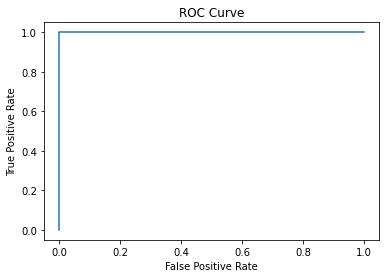

In [232]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# assuming you have true labels Y_test and predicted probabilities Y_pred_proba_test
fpr, tpr, thresholds = roc_curve(Y_train, Y_pred_train)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# ROC CURVE FOR XGBOOST TEST

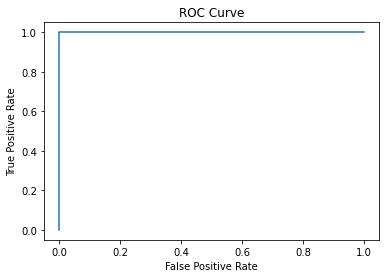

In [233]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# assuming you have true labels Y_test and predicted probabilities Y_pred_proba_test
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# LOG LOSS VALUE OF XGBOOST

In [234]:
from sklearn.metrics import log_loss

# assuming Y_train is the true labels of the training set and Y_pred_train is the predicted probabilities of the positive class
log_loss_train1 = log_loss(Y_train, Y_pred_train)

# assuming Y_test is the true labels of the test set and Y_pred_test is the predicted probabilities of the positive class
log_loss_test1 = log_loss(Y_test, Y_pred_test)

print('Log loss for training set:', log_loss_train1)
print('Log loss for test set:', log_loss_test1)

Log loss for training set: 9.992007221626413e-16
Log loss for test set: 9.992007221626415e-16


In [235]:
table = {'Classifier' : ['Logistic Regression','K-Nearest Neighbourhood Classifier','Naive-Bayes Classifier','SVM Classifier_non_Linear','SVM Classifier_Linear','Decision Tree Classifier_gini','Decision Tree Classifier_entropy','BaggingClassifier','Random Forest Classifier','Gradient Boosting Classifier','AdaBoost Classifier','Xtreme Gradient Boosting Classifier'], 
         'Training_Accuracy' : [Accuracy_score_train_1, Accuracy_score_train_2, Accuracy_score_train_3, Accuracy_score_train_4, Accuracy_score_train_5, Accuracy_score_train_6, Accuracy_score_train_7, Accuracy_score_train_8, Accuracy_score_train_9,Accuracy_score_train_10,Accuracy_score_train_11,Accuracy_score_train_12], 
         'Testing_Accuracy' : [Accuracy_score_test_1,Accuracy_score_test_2, Accuracy_score_test_3,Accuracy_score_test_4,Accuracy_score_test_5,Accuracy_score_test_6, Accuracy_score_test_7, Accuracy_score_test_8, Accuracy_score_test_9,Accuracy_score_test_10,Accuracy_score_test_11,Accuracy_score_test_12], 
         'Precision Score train' : [Precision_score_train_1, Precision_score_train_2, Precision_score_train_3, Precision_score_train_4, Precision_score_train_5, Precision_score_train_6, Precision_score_train_7, Precision_score_train_8, Precision_score_train_9,Precision_score_train_10,Precision_score_train_11,Precision_score_train_12],
         'Precision Score test' : [Precision_score_test_1, Precision_score_test_2, Precision_score_test_3, Precision_score_test_4, Precision_score_test_5, Precision_score_test_6, Precision_score_test_7, Precision_score_test_8, Precision_score_test_9,Precision_score_test_10,Precision_score_test_11,Precision_score_test_12],
         'Recall Score train' : [Sensitivity_score_train_1, Sensitivity_score_train_2, Sensitivity_score_train_3, Sensitivity_score_train_4, Sensitivity_score_train_5, Sensitivity_score_train_6, Sensitivity_score_train_7, Sensitivity_score_train_8, Sensitivity_score_train_9,Sensitivity_score_train_10,Sensitivity_score_train_11,Sensitivity_score_train_12],
         'Recall Score test' : [Sensitivity_score_test_1, Sensitivity_score_test_2, Sensitivity_score_test_3, Sensitivity_score_test_4, Sensitivity_score_test_5, Sensitivity_score_test_6, Sensitivity_score_test_7, Sensitivity_score_test_8, Sensitivity_score_test_9,Sensitivity_score_test_10,Sensitivity_score_test_11,Sensitivity_score_test_12],
         'F1_Score train' : [F1_score_train_1, F1_score_train_2, F1_score_train_3, F1_score_train_4, F1_score_train_5, F1_score_train_6, F1_score_train_7, F1_score_train_8, F1_score_train_9,F1_score_train_10,F1_score_train_11,F1_score_train_12],
        'F1_Score test' : [F1_score_test_1, F1_score_test_2, F1_score_test_3, F1_score_test_4, F1_score_test_5, F1_score_test_6, F1_score_test_7, F1_score_test_8, F1_score_test_9,F1_score_test_10,F1_score_test_11,F1_score_test_12]}
table = pd.DataFrame(table)
table

,Classifier,Training_Accuracy,Testing_Accuracy,Precision Score train,Precision Score test,Recall Score train,Recall Score test,F1_Score train,F1_Score test
0,Logistic Regression,0.995,1.000,0.990,1.0,1.0,1.000,0.995,1.000
1,K-Nearest Neighbourhood Classifier,0.984,0.984,0.990,1.0,1.0,0.976,0.995,0.988
2,Naive-Bayes Classifier,0.973,1.000,0.953,1.0,1.0,1.000,0.976,1.000
3,SVM Classifier_non_Linear,1.000,0.984,1.000,1.0,1.0,0.976,1.000,0.988
4,SVM Classifier_Linear,1.000,0.984,1.000,1.0,1.0,0.976,1.000,0.988
5,Decision Tree Classifier_gini,1.000,1.000,1.000,1.0,1.0,1.000,1.000,1.000
6,Decision Tree Classifier_entropy,1.000,1.000,1.000,1.0,1.0,1.000,1.000,1.000
7,BaggingClassifier,1.000,1.000,1.000,1.0,1.0,1.000,1.000,1.000
8,Random Forest Classifier,1.000,1.000,1.000,1.0,1.0,1.000,1.000,1.000
9,Gradient Boosting Classifier,1.000,1.000,1.000,1.0,1.0,1.000,1.000,1.000
